In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 19.5 MB/s eta 0:00:00


In [2]:
!pip install torch 

In [3]:
import torch
import os
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [4]:
# Đường dẫn lưu file .yaml trên Google Drive (hoặc Kaggle)
yaml_path = "/kaggle/working/dataset.yaml"

# Nội dung của file dataset.yaml
yaml_content = """
train: /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/train
val: /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/val
test: //kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/test

# Số lượng lớp
nc: 5

# Tên các lớp theo thứ tự ID
names: ['Motorbike', 'bicycle', 'boat', 'bus', 'car']
"""

# Tạo và ghi nội dung vào file .yaml
with open(yaml_path, "w", encoding="utf-8") as yaml_file:
    yaml_file.write(yaml_content)

print("File dataset.yaml đã được tạo thành công!")

File dataset.yaml đã được tạo thành công!


In [5]:
from ultralytics import YOLO
# 1) Khởi tạo model từ pretrained YOLOv8n (hoặc v8s, v8m,...)
model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 404MB/s]


In [6]:
# 2) Train
results = model.train(
    data='/kaggle/working/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='/kaggle/working/',
    optimizer='Adam',             # Optimizer Adam
    lr0=1e-4,
    name='yolov8m_enhanced_histogram_And_denoise'
)

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/, name=yolov8m_enhanced_histogram_And_denoise, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/train/labels... 2099 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2099/2099 [00:05<00:00, 396.20it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/val/labels... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:01<00:00, 402.00it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/val is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolov8m_enhanced_histogram_And_denoise/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolov8m_enhanced_histogram_And_denoise
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       8.6G      1.505      2.193      1.634          9        640: 100%|██████████| 132/132 [01:24<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

                   all        600       1407      0.652      0.371      0.418      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.57G      1.364      1.589      1.513         19        640: 100%|██████████| 132/132 [01:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.35it/s]

                   all        600       1407       0.66      0.588      0.639      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.57G      1.301      1.447      1.464          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.36it/s]

                   all        600       1407      0.711      0.632       0.71      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.69G      1.281      1.354       1.43         10        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1407      0.747      0.651      0.719      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.67G      1.243      1.284      1.422          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.771      0.616      0.713      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.66G      1.234      1.238      1.424         17        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1407      0.776      0.665      0.738      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.66G      1.187      1.162      1.376         11        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.773      0.679      0.759      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.66G      1.165        1.1      1.374          7        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1407      0.763      0.687      0.758      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.66G      1.132      1.035      1.349          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1407      0.784      0.685      0.774       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.66G      1.119      1.004      1.336         22        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.805      0.697      0.788      0.508


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.66G       1.08     0.8617      1.317          4        640: 100%|██████████| 132/132 [01:22<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.816      0.695      0.794      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.64G      1.056     0.8058      1.297          6        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.805      0.713      0.794      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.65G      1.032     0.7735       1.27          6        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1407      0.808      0.707      0.807      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.86G     0.9967     0.7011      1.243         10        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1407      0.834      0.705      0.805       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.65G     0.9849     0.6676      1.228          6        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1407      0.836      0.706      0.804      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.66G     0.9444     0.6254      1.196          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1407      0.841      0.696      0.799      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.67G     0.9281     0.6024      1.179          9        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1407       0.84      0.722      0.807      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.89G     0.9108     0.5883      1.177          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1407      0.834       0.73      0.809      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.66G     0.8799     0.5578      1.152          8        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.37it/s]

                   all        600       1407      0.834       0.73      0.811      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.66G     0.8855     0.5537      1.172         12        640: 100%|██████████| 132/132 [01:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1407      0.804      0.752      0.812      0.527



20 epochs completed in 0.507 hours.
Optimizer stripped from /kaggle/working/yolov8m_enhanced_histogram_And_denoise/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/yolov8m_enhanced_histogram_And_denoise/weights/best.pt, 52.0MB

Validating /kaggle/working/yolov8m_enhanced_histogram_And_denoise/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.11it/s]


                   all        600       1407      0.805      0.754      0.812      0.527
             Motorbike        134        268      0.814      0.731      0.806      0.455
               bicycle        149        228      0.851      0.763      0.835      0.551
                  boat        131        243      0.702      0.667      0.707        0.4
                   bus         99        123      0.885      0.874      0.918      0.705
                   car        233        545      0.771      0.736      0.795      0.525
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/yolov8m_enhanced_histogram_And_denoise


In [7]:
# Đường dẫn tới mô hình YOLO
model_path = "/kaggle/working/yolov8m_enhanced_histogram_And_denoise/weights/best.pt"
model = YOLO(model_path)

# Đường dẫn thư mục chứa ảnh test
source_folder = "/kaggle/input/cs406-data/Enhanced_Dataset_And_Denoise/Enhanced_Dataset_And_Denoise/test/images"

# Thư mục tạm để lưu trữ 20 ảnh mẫu
sample_folder = "/kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect"
os.makedirs(sample_folder, exist_ok=True)

# Lấy danh sách file ảnh từ folder test
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Lấy 20 file đầu tiên (hoặc ít hơn nếu không đủ 20 file)
sample_files = image_files[:20]

# Copy 20 ảnh này vào thư mục tạm
for file_name in sample_files:
    shutil.copy(os.path.join(source_folder, file_name), os.path.join(sample_folder, file_name))

# Thực hiện detect trên thư mục mẫu
results = model.predict(
    source=sample_folder,  # Thư mục chứa 20 ảnh
    conf=0.25,
    imgsz=640,
    save=True,
    save_txt=True
)

print("Detection completed on 20 images.")



image 1/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00344.jpg: 640x640 1 bicycle, 2 cars, 14.8ms
image 2/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00370.jpg: 640x640 1 Motorbike, 1 bicycle, 14.9ms
image 3/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00648.png: 640x640 1 bicycle, 14.9ms
image 4/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00778.jpg: 640x640 2 boats, 14.8ms
image 5/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00832.jpg: 640x640 1 boat, 14.8ms
image 6/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_00882.jpg: 640x640 5 boats, 14.8ms
image 7/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_01271.jpg: 640x640 1 boat, 14.7ms
image 8/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/detect/2015_01303.jpg: 640x640 3 boats, 14.7ms
image 9/20 /kaggle/working/yolov8m_enhanced_histogram_And_denoise/dete

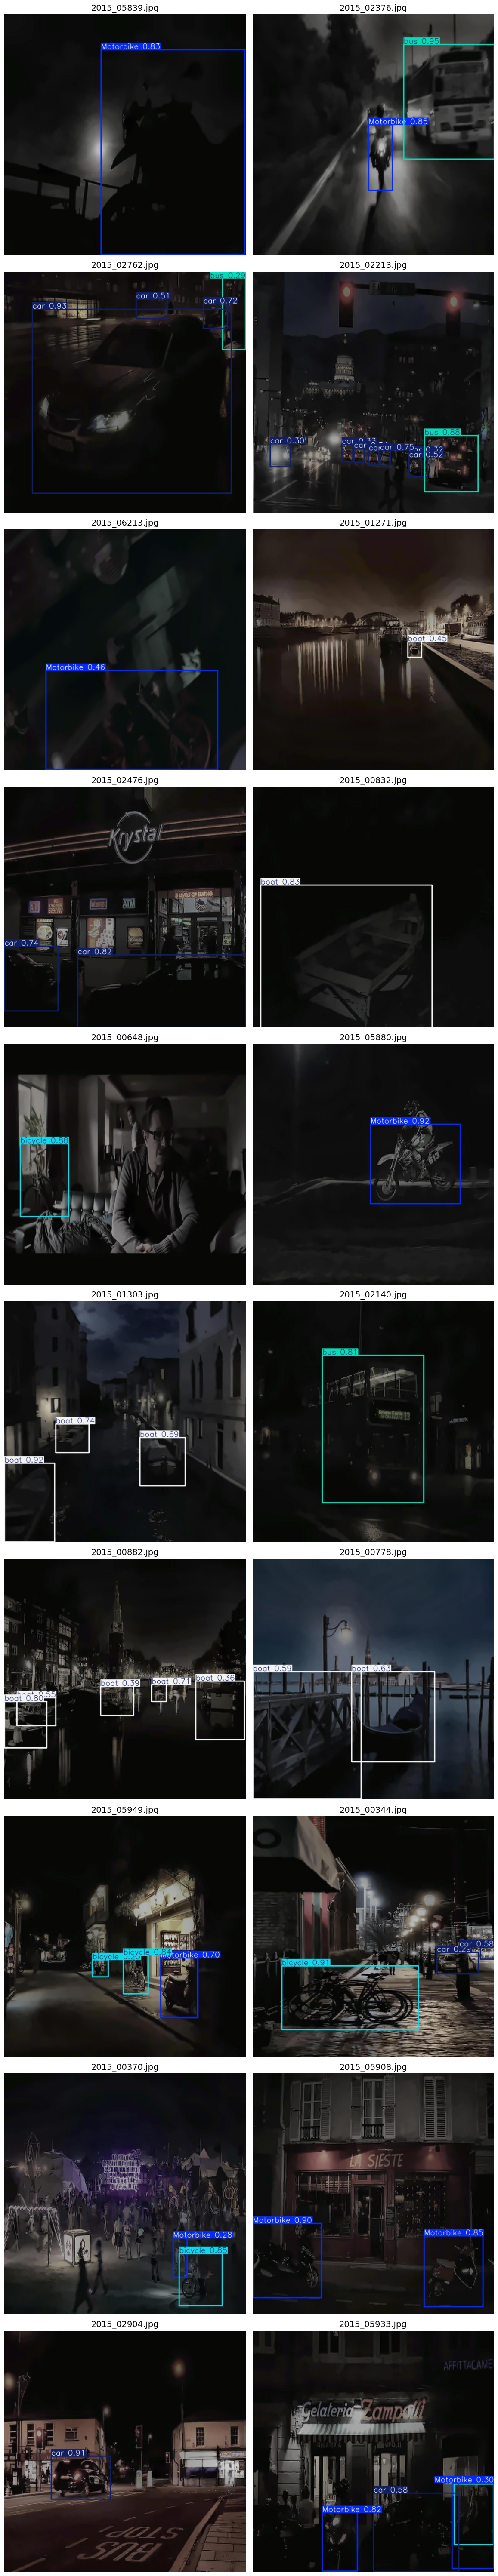

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pred_dir = "/kaggle/working/runs/detect/predict"  # Thư mục YOLOv8 lưu ảnh kết quả

# Lấy danh sách file ảnh
image_files = [
    f for f in os.listdir(pred_dir) 
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
]

# Trộn ngẫu nhiên
random.shuffle(image_files)

# Lấy tối đa 30 ảnh
num_to_display = min(30, len(image_files))
selected_files = image_files[:num_to_display]

# Cấu hình lưới 15 hàng, 2 cột
num_rows = 10
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 60))

# Với trường hợp ít hơn 30 ảnh, bạn cần tính số hàng thực tế
# nhưng để đơn giản, ta cứ hiển thị trên tối đa 30 ô đầu tiên.
for i, file_name in enumerate(selected_files):
    # Chỉ lấy 30 ảnh nên i < 30
    row = i // num_cols
    col = i % num_cols
    
    file_path = os.path.join(pred_dir, file_name)
    img = mpimg.imread(file_path)
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(file_name, fontsize=14)
    axes[row, col].axis("off")  # tắt hiển thị trục

plt.tight_layout()
plt.show()

In [9]:
import zipfile
import os

# Tạo file ZIP
with zipfile.ZipFile('yolov8m_enhanced_histogram_And_denoise.zip', 'w') as zipf:
    # Thêm file yolov8m.pt
    zipf.write('yolov8m.pt')
    
    # Thêm toàn bộ thư mục yolov8m_no_enhanced
    folder_path = 'yolov8m_enhanced_histogram_And_denoise'
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)  # Lưu đường dẫn tương đối
            zipf.write(file_path, os.path.join('yolov8m_enhanced_histogram_And_denoise', arcname))

print("File ZIP đã được tạo: yolov8m_enhanced_histogram_And_denoise.zip")


File ZIP đã được tạo: yolov8m_enhanced_histogram_And_denoise.zip


In [10]:
import shutil
"""
# Đường dẫn thư mục output
output_dir = '/kaggle/working/runs'

# Xóa thư mục và toàn bộ nội dung bên trong
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
    print(f"Đã xóa thư mục: {output_dir}")
else:
    print(f"Thư mục không tồn tại: {output_dir}")
"""

'\n# Đường dẫn thư mục output\noutput_dir = \'/kaggle/working/runs\'\n\n# Xóa thư mục và toàn bộ nội dung bên trong\nif os.path.exists(output_dir):\n    shutil.rmtree(output_dir)\n    print(f"Đã xóa thư mục: {output_dir}")\nelse:\n    print(f"Thư mục không tồn tại: {output_dir}")\n'